# Assignment 2 : Jouksowski Transformation


## Introduction 
Complex analysis was used to study potential flows without directly solving partial differential governing equation 

We will learn how to obtain potential flow over an airfoil starting with the flow over a cylinder and conformal mapping **JOUKOWSKI TRANSFORMATION**


## Complex numbers! 

In python: j is the square root of negative 1 *not* i 


In [2]:
#importing necessary libraries 
import math
import numpy
import cmath #complex math!
from matplotlib import pyplot

#embed the figures inline
%matplotlib inline

In [3]:
3 + 2j

(3+2j)

In [4]:
a= 3
b=3 
z = a + b*1j
print('z= ', z)
print('The type of the variable is ', type(z))

z=  (3+3j)
The type of the variable is  <class 'complex'>


**1. Exercises Getting Used to Using Complex Number on Python**

This is a graded exercise on the OpenEdX page

In [5]:
#getting familiar with the complex number operation in Python 
(2.75  + 3.69*1j)*(8.55-6.13*1j)

(46.1322+14.692000000000004j)

This multiplied using the "foil method" and multiplied the different components 


In [6]:
1.4*cmath.exp(5.32j)

(0.799270785858235-1.1494199453957457j)

This applied the Euler method

In [7]:
(7.51-9.15j)/(4.43+9.64j)

(-0.4880897698448308-1.0033441577191493j)

** 2. Shaped Created by the Joukowski Transformation**

We want to write a function that takes *z* and *c* as parameters and returns the Joukowski Transformation of *z*

In [8]:
def joukowski_trans(z,c):
    """
    Parameters 
    z = complex number in the form of x + yj
    c = some constant (real) 
    
    
    Returns 
    eta: also a complex number mapped from z and c
    """
    eta = z + c**2/z
    return eta 

In [9]:
# Defining the circle and calculating z 
c=1.0
R = 1.5 
theta = numpy.linspace(0,2*math.pi, 100)
z = R*numpy.cos(theta) + 1j*R*numpy.sin(theta)

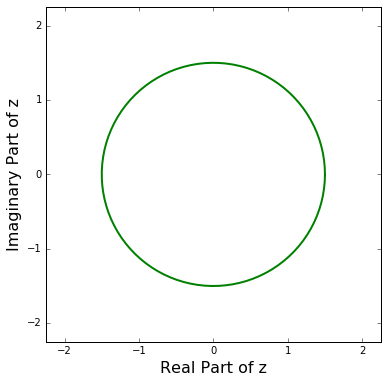

In [10]:
# plotting the circle before the transformation 
size = 6 
pyplot.figure(figsize=(size,size))
pyplot.xlabel('Real Part of z', fontsize=16)
pyplot.ylabel('Imaginary Part of z', fontsize=16)
pyplot.xlim(-R*1.5, R*1.5)
pyplot.ylim(-R*1.5, R*1.5)
pyplot.plot(z.real,z.imag, color='g',linewidth =2, linestyle='-');

In [11]:
# applying the Joukowski Transformation to the circle 
eta_circle = joukowski_trans(z,c)

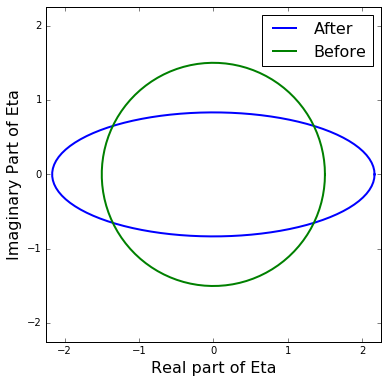

In [12]:
## Plotting the new transformed shape from the transformation 
size = 6 
pyplot.figure(figsize=(size,size))
pyplot.xlabel('Real part of Eta', fontsize = 16)
pyplot.ylabel('Imaginary Part of Eta', fontsize =16)
pyplot.xlim(-R*1.5, R*1.5)
pyplot.ylim(-R*1.5, R*1.5)
pyplot.plot(eta_circle.real, eta_circle.imag, label ='After', color ='b', linewidth=2, linestyle='-')
pyplot.plot(z.real,z.imag, label= 'Before',color='g',linewidth =2, linestyle='-');
pyplot.legend(loc='best', prop={'size':16});

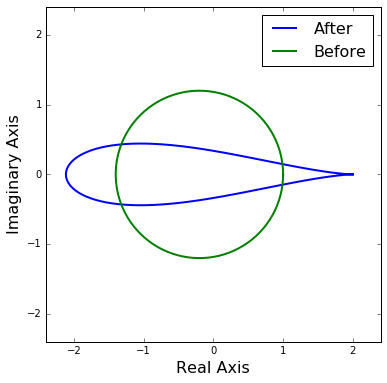

In [13]:
# Defining a new Circle for the next exercise, centered a (c-R,0) 
c = 1
R = 1.2
z = R*numpy.cos(theta)+(c-R)+R*numpy.sin(theta)*1j

# calculating the transformation
eta = joukowski_trans(z,c)

#plotting the before and after 
size = 6 
pyplot.figure(figsize=(size,size))
pyplot.xlabel('Real Axis', fontsize = 16)
pyplot.ylabel('Imaginary Axis', fontsize =16)
pyplot.xlim(-R*2, R*2)
pyplot.ylim(-R*2, R*2)
pyplot.plot(eta.real, eta.imag, label ='After', color ='b', linewidth=2, linestyle='-')
pyplot.plot(z.real,z.imag, label= 'Before',color='g',linewidth =2, linestyle='-');
pyplot.legend(loc='best', prop={'size':16});

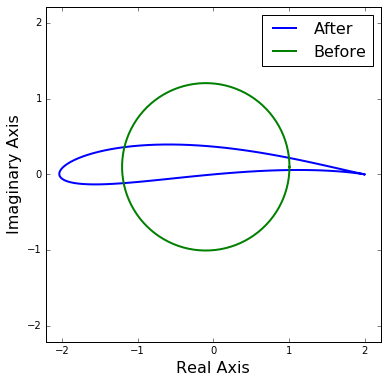

In [14]:
# Another exercise in Joukowski Transformations 
delta_x = -0.1 
delta_y = 0.1

#Calculating the radius according to the problem specifics
R = math.sqrt((c-delta_x)**2+(delta_y)**2)

#Calculating the z coordinates 
z = R*numpy.cos(theta)+delta_x + (R*numpy.sin(theta)+delta_y)*1j

# Joukowski Transformation
eta = joukowski_trans(z,c)

#plotting 
#plotting the before and after 
size = 6 
pyplot.figure(figsize=(size,size))
pyplot.xlabel('Real Axis', fontsize = 16)
pyplot.ylabel('Imaginary Axis', fontsize =16)
pyplot.xlim(-R*2, R*2)
pyplot.ylim(-R*2, R*2)
pyplot.plot(eta.real, eta.imag, label ='After', color ='b', linewidth=2, linestyle='-')
pyplot.plot(z.real,z.imag, label= 'Before',color='g',linewidth =2, linestyle='-');
pyplot.legend(loc='best', prop={'size':16});

**3. Grid points on the z-plane using polar coordinates**


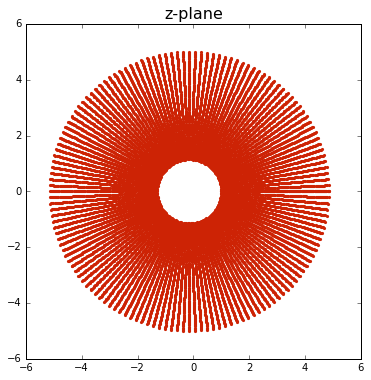

In [15]:
# defining coordinates 
xc = -0.15
yc = 0 
R = 1.15
c = 1 

# Discritizing the coordinates 
Nr = 100
r = numpy.linspace(R, 5, Nr)
Ntheta = 145 
theta = numpy.linspace(0,2*math.pi,Ntheta) 

r_tot, theta_tot = numpy.meshgrid(r,theta)

# calculating the z coordinates
z = r_tot*numpy.cos(theta_tot)+xc + 1j*(r_tot*numpy.sin(theta_tot)+yc)

# calculating the transformtion
eta = joukowski_trans(z,c)

#Plotting to Visualize the scatter plots in the z-plane
size = 6
pyplot.figure(figsize=(size, size))
pyplot.xlim(-6,6)
pyplot.ylim(-6,6)
pyplot.title('z-plane', fontsize=16);
pyplot.scatter(z.real,z.imag,s=10,color='#CD2305',marker='o',linewidth=0);


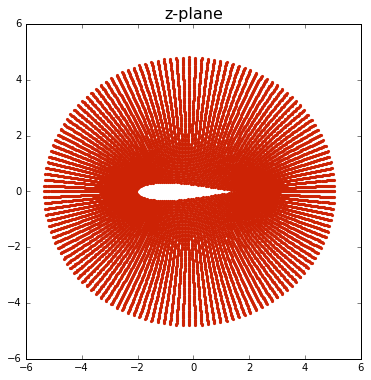

In [16]:
#plotting to visualize the scatter plots in the eta plane 
size = 6
pyplot.figure(figsize=(size, size))
pyplot.xlim(-6,6)
pyplot.ylim(-6,6)
pyplot.title('z-plane', fontsize=16);
pyplot.scatter(eta.real,eta.imag,s=10,color='#CD2305',marker='o',linewidth=0);


** 4. Flow over  a symmetric Joukowski airfoil with zero angle of attack 

We are going to evaluate the flow over these shapes using a free stream velocity 



In [17]:
# define the freestream velocity 
u_inf = 1.0 
psi_freestream = u_inf*z.imag

# to have a R = 1.15, we need to calculate what the strength of the doublet should be 
strength = 2*math.pi*u_inf*R**2

# define a function to get the velocity of the doublet 
def get_velocity_doublet(strength,xd,yd,X,Y):
    """
    returns the velocity field generated by a doublet 
    
    Parameters
    ----------
    strength(float): strength of the doublet
    xd(float): x-coordinate of the doublet
    yd(float): y-coordinate of the doublet 
    X(2D Numpy array of floats): x-coordinate mesh points 
    Y(2D Numpy array of floats): y-coordinate mesh points 
    
    Returns
    --------
    u(2D Numpy array of floats): x-component of the velocity vector field
    v(2D Numpy array of floats): y-component of the velocity vector field 
    
    """
    
    u = -strength/(2*math.pi)*((X-xd)**2-(Y-yd)**2)/((X-xd)**2+(Y-yd)**2)**2
    v = -strength/(2*math.pi)*2*(X-xd)*(Y-yd)/((X-xd)**2+(Y-yd)**2)**2
    
    return u,v 

def get_stream_function_doublet(strength,xd,yd,X,Y):
    """
    Returns the stream-function generated by a doublet. 
    
    Parameters
    ----------
    strength(float): strength of the doublet 
    xd(float): x-coordinate of a doublet 
    yd(float): y-coordinate of a doublet 
    X(2D Numpy array of floats): x-coordinate of the mesh points
    Y(2D Numpy array of floats): y coordinate of the mesh points 
    
    Returns 
    -------
    psi(2D Numpy array or floats): The stream function
    """
    psi = - strength/(2*math.pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)
    return psi

In [18]:
# calculating the doublet velocity field 
u_z, v_z = get_velocity_doublet(strength,xc,yc,z.real,z.imag)
psi_z = get_stream_function_doublet(strength,xc,yc,z.real,z.imag)


U = u_inf + u_z
V = v_z
psi = psi_freestream +psi_z

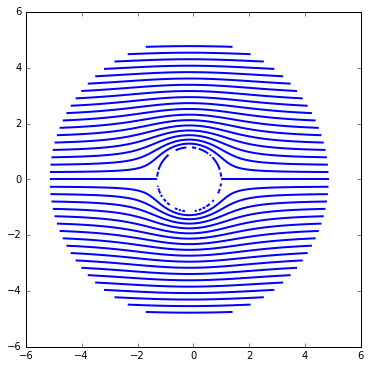

In [25]:
size =6
pyplot.figure(figsize=(size, size))

pyplot.xlim(-6,6)
pyplot.ylim(-6,6)
pyplot.contour(z.real, z.imag, psi, 40, colors='b', linewidths=2, linestyles='solid', arrowstyle='->');

In [22]:
numpy.max(psi)

4.7355